# Covid 19 Data Visualization 

Dünyanın ve ülkelerin zamana bağlı değişim grafikleri ve kıtalara göre ülkelerdeki vaka, ölüm verilerini görselleştirdim.

Verileri çektiğim api'da güncel covid19 verileri, regions.csv dosyasında ise ülkelerin bulunduğu kıtaların listesi mevcut. Bu iki veri setini birleştirip ülkelerin güncel covid19 durumunu kıtalara göre grupladım. 

Grafikler inline olduğu için detayı gözükmüyor, jupyterde açıp %matplotlib qt komutunu girerseniz farklı bir pencerede açılır, yaklaştırıp uzaklaştırabilirsiniz.


In [1]:
import pandas as pd
import json
import requests
from pandas import json_normalize
from matplotlib import pyplot as plt


### Api verileri çok karmaşık sunuyor, manuel olarak parse etmek saçma olacağı için json_normalize methoduyla parse ettim

In [2]:
response = requests.get('https://corona-api.com/countries').json()['data']

### Api'de 248 ülkeye ait:
* Vaka Sayıları
* Ölüm Sayıları
* İyileşen Sayıları
* Timeline verileri mevcut, işimize yaramayacak başka verilerde var, az sonra temizleyeceğim.
 

In [3]:
covid = json_normalize(response)

In [4]:
covid.shape

(249, 16)

In [5]:
covid.head(10)

,name,code,population,updated_at,coordinates.latitude,coordinates.longitude,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.recovered_vs_death_ratio,latest_data.calculated.cases_per_million_population
0,Afghanistan,AF,29121286.0,2020-05-03T20:45:01.303Z,33.00,65.0,13,235,85,2704,345,7,3.143491,12.758876,None,69.0
1,Albania,AL,2986952.0,2020-05-03T20:45:01.303Z,41.00,20.0,0,6,31,795,531,7,3.899371,66.792453,None,276.0
2,Åland Islands,AX,26711.0,2020-05-03T20:45:01.303Z,0.00,0.0,0,0,0,0,0,0,NaN,NaN,None,0.0
3,American Samoa,AS,57881.0,2020-05-03T20:45:01.303Z,0.00,0.0,0,0,0,0,0,0,NaN,NaN,None,0.0
4,Algeria,DZ,34586184.0,2020-05-03T20:45:01.303Z,28.00,3.0,4,179,463,4474,1936,22,10.348681,43.272240,None,102.0
5,Andorra,AD,84000.0,2020-05-03T20:45:01.303Z,42.50,1.6,0,0,44,747,472,17,5.890228,63.186078,None,9668.0
6,Angola,AO,13068161.0,2020-05-03T20:45:01.303Z,0.00,0.0,0,0,2,35,11,0,5.714286,31.428571,None,1.0
7,Anguilla,AI,13254.0,2020-05-03T20:45:01.303Z,0.00,0.0,0,0,0,3,3,0,0.000000,100.000000,None,200.0
8,Antigua and Barbuda,AG,86754.0,2020-05-03T20:45:01.303Z,17.05,-61.8,0,0,3,25,15,1,12.000000,60.000000,None,255.0
9,Antarctica,AQ,NaN,2020-05-03T20:45:01.303Z,0.00,0.0,0,0,0,0,0,0,NaN,NaN,None,0.0


latest_data -> Toplam veriyi ifade ediyor

### Gereksiz bilgileri silebiliriz

Elimizde ülkelerin günlük ve toplam covid19 verileri gibi gerekli bilgiler olduğu gibi, koordinat ve güncelleme gibi gereksiz bilgilerde var.Bunlardan kurtulmak istiyorum.

In [6]:
covid.drop(['updated_at','coordinates.latitude','coordinates.longitude','latest_data.calculated.recovered_vs_death_ratio',],
           axis = 1, inplace=True)

In [7]:
covid.head()

,name,code,population,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.cases_per_million_population
0,Afghanistan,AF,29121286.0,13,235,85,2704,345,7,3.143491,12.758876,69.0
1,Albania,AL,2986952.0,0,6,31,795,531,7,3.899371,66.792453,276.0
2,Åland Islands,AX,26711.0,0,0,0,0,0,0,NaN,NaN,0.0
3,American Samoa,AS,57881.0,0,0,0,0,0,0,NaN,NaN,0.0
4,Algeria,DZ,34586184.0,4,179,463,4474,1936,22,10.348681,43.272240,102.0


### Kıtaları çekiyorum

Ülkelerin bulunduğu kıtaları regions.csv dosyasından çekiyorum

In [8]:
data = pd.read_csv('../input/country-mapping-iso-continent-region/continents2.csv')

In [9]:
regions = pd.DataFrame(data)

In [10]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Bu veri setinde ihtiyaç duyduğum tek şey ülkelerin alpha2 kodu ve bulundukları kıtalar, işime yaramayan sütunlardan kurtuluyorum.

In [11]:
cols_to_keep = ['alpha-2','region']

In [12]:
regions = regions[cols_to_keep]

In [13]:
regions.head()

,alpha-2,region
0,AF,Asia
1,AX,Europe
2,AL,Europe
3,DZ,Africa
4,AS,Oceania


### Covid verileriyle kıta verilerini birleştiriyorum

Merge işlemini ülkelerin ISO kodlarına göre yapacağım.Covid verilerinin bulunduğu DataFrame'de ISO kodlarını tuttuğum sütunun ismi code , regions adlı DataFrame'de ise alpha-2. Merge işlemini yapabilmek için alpha-2 adlı sütunun ismini code yapıyorum. 

In [14]:
regions.rename(columns = {'alpha-2':'code'}, inplace = True)

In [15]:
data = covid.merge(regions , on='code')

### Ülkeleri vaka sayısına göre sıralıyorum

In [16]:
data.sort_values(by="latest_data.confirmed", ascending=False, inplace=True)

In [17]:
data.reset_index(inplace=True)

In [18]:
del data['index']

In [19]:
data

,name,code,population,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.cases_per_million_population,region
0,USA,US,310232863.0,963,23937,68407,1184711,178219,16139,5.774151,15.043247,3579.0,Americas
1,Spain,ES,46505963.0,164,1533,25264,247122,148558,2386,10.223291,60.115247,5285.0,Europe
2,Italy,IT,60340328.0,174,1389,28884,210717,81654,1501,13.707484,38.750552,3485.0,Europe
3,UK,GB,62348447.0,315,4339,28446,186599,0,1559,15.244455,0.000000,2749.0,Europe
4,France,FR,64768389.0,135,297,24895,168693,50784,3819,14.757577,30.104391,2584.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,"Korea, Democratic People's Republic of",KP,22912177.0,0,0,0,0,0,0,NaN,NaN,0.0,Asia
244,Cape Verde,CV,508659.0,0,0,0,0,0,0,NaN,NaN,0.0,Africa
245,Cook Islands,CK,21388.0,0,0,0,0,0,0,NaN,NaN,0.0,Oceania
246,Jersey,JE,90812.0,0,0,0,0,0,0,NaN,NaN,0.0,Europe


### Ölüm oranı NaN olan ülkelerde vaka yok, bu ülkeleri silebiliriz

In [20]:
data.dropna(subset=['latest_data.calculated.death_rate'],inplace=True)

In [21]:
data.shape

(205, 13)

Ülke sayısı 248'den 205'e düştü

### Ülkeleri kıtalara göre grupluyorum

In [22]:
data["region"].value_counts()

Americas    52
Africa      52
Asia        48
Europe      46
Oceania      7
Name: region, dtype: int64

In [23]:
grouped_data = data.groupby(["region"])

In [24]:
grouped_data.get_group("Asia")

,name,code,population,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.cases_per_million_population,region
7,Turkey,TR,7.780412e+07,61,1670,3397,126045,63151,1424,2.695069,50.101948,1495.0,Asia
9,Iran,IR,7.692330e+07,47,976,6203,97424,78422,2690,6.367014,80.495566,1160.0,Asia
10,China,CN,1.330044e+09,0,2,4633,82877,77713,34,5.590212,93.769079,58.0,Asia
14,India,IN,1.173108e+09,68,2806,1391,42505,11775,0,3.272556,27.702623,31.0,Asia
18,Saudi Arabia,SA,2.573178e+07,8,1552,184,27011,4134,139,0.681204,15.304876,776.0,Asia
23,Pakistan,PK,1.844048e+08,20,1062,457,20084,5114,111,2.275443,25.463055,91.0,Asia
25,Singapore,SG,4.701069e+06,1,657,18,18205,1408,22,0.098874,7.734139,3112.0,Asia
27,Israel,IL,7.353985e+06,3,23,232,16208,9749,103,1.431392,60.149309,1873.0,Asia
29,Qatar,QA,8.409260e+05,0,679,12,15551,1664,72,0.077165,10.700277,5398.0,Asia
30,Japan,JP,1.272880e+08,0,0,474,14571,3205,324,3.253037,21.995745,115.0,Asia


Asya kıtasındaki ülkeleri toplam vaka sayısına göre sıralıyorum

In [25]:
continent = grouped_data.get_group("Asia").sort_values(by="latest_data.confirmed", ascending=False)

Yukarıda ülkeleri vaka sayısına göre sıraladığımız için şimdi kıtalara göre grupladığımız halde, hangi ülkenin dünyada kaçıncı sırada olduğunu görebiliyoruz

In [26]:
continent.head()

,name,code,population,today.deaths,today.confirmed,latest_data.deaths,latest_data.confirmed,latest_data.recovered,latest_data.critical,latest_data.calculated.death_rate,latest_data.calculated.recovery_rate,latest_data.calculated.cases_per_million_population,region
7,Turkey,TR,7.780412e+07,61,1670,3397,126045,63151,1424,2.695069,50.101948,1495.0,Asia
9,Iran,IR,7.692330e+07,47,976,6203,97424,78422,2690,6.367014,80.495566,1160.0,Asia
10,China,CN,1.330044e+09,0,2,4633,82877,77713,34,5.590212,93.769079,58.0,Asia
14,India,IN,1.173108e+09,68,2806,1391,42505,11775,0,3.272556,27.702623,31.0,Asia
18,Saudi Arabia,SA,2.573178e+07,8,1552,184,27011,4134,139,0.681204,15.304876,776.0,Asia


# Dünyanın ve Ülkelerin Zamana Bağlı Değişimleri

### İstekte bulunduğum api verileri ülkelerin alpha2 koduna göre sunuyor. Bunun için ülke adını alpha2 koduna çevirecek bir fonksiyon tanımlıyorum.

In [27]:
def alpha_2(country_name):
        with open('../input/alpha2/ulkeler.json' ,encoding="utf8") as f:
            data = json.load(f)
        for alpha_code,name in data.items():
            if name.lower() == country_name.lower():
                code = alpha_code
                return code
        if country_name[0] == "i" or country_name[0] == "I" :
            raise NameError(f'{country_name} ülkesinin ilk harfini şu şekilde yazın => {"İ"+country_name[1:]}')
        else:
            raise NameError(f'{country_name} değerine karşılık gelen bir alpha-2 kodu bulunamadı')

### Ülkelerin ve Dünyanın timeline grafiğini çizecek fonksiyonu tanımlıyorum.
Hiç parametre verilmezse dünyanın grafiğini çizecek. Parametre olarak herhangi bir ülke adı verilirse o ülkenin grafiğini çizecek


In [28]:
def timeline_graph(arg="World"):
        if arg == 'World':
            response = requests.get('https://corona-api.com/timeline').json()['data']
        else:
            code = alpha_2(arg)
            response = timeline = requests.get(f'https://corona-api.com/countries/{code}').json()['data']['timeline']
            
        timeline = response
        data = {'dates':[],'confirmed':[],'deaths':[],'recovered':[]}
        for day in timeline:
            data['dates'].append(day['date'])
            data['confirmed'].append(day['confirmed'])
            data['deaths'].append(day['deaths'])
            data['recovered'].append(day['recovered'])
                  
   
        plt.rcParams["figure.figsize"] = [16,9]
        plt.style.use("fast")
        plt.plot(data.get('dates')[::-1],data.get('confirmed')[::-1],  label = "confirmed")
        plt.plot(data.get('dates')[::-1],data.get('deaths')[::-1],  label = "deaths")
        plt.plot(data.get('dates')[::-1],data.get('recovered')[::-1],  label = "recovered")


        
        plt.xlabel("Tarih")
        
        plt.xticks(rotation='vertical', fontsize='8')
        plt.ylabel("Sayı")
        plt.tight_layout()
        plt.title(f"Covid19 {arg} Timeline")

        plt.legend()

        plt.show()

    

### Fonksiyona parametre vermezsek tüm dünyanın zamana bağlı değişim grafiğini çizecek

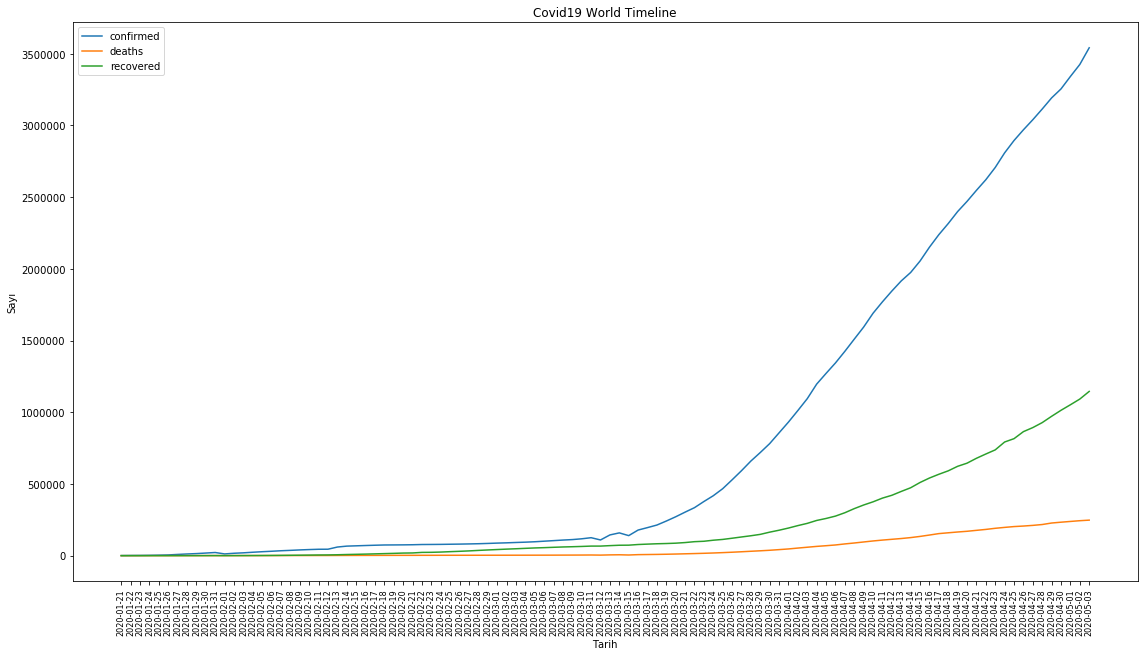

In [29]:
timeline_graph()

### Artık 205 ülkeden herhangi birini parametre olarak verip grafiğini çizdirebiliriz 

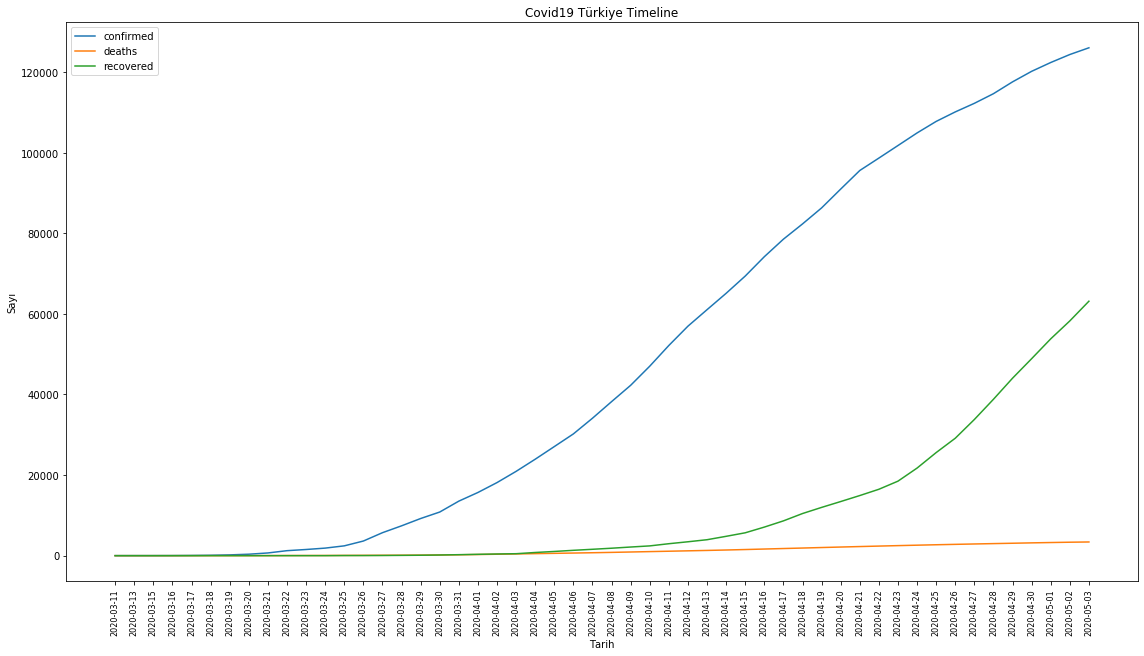

In [30]:
timeline_graph("Türkiye")

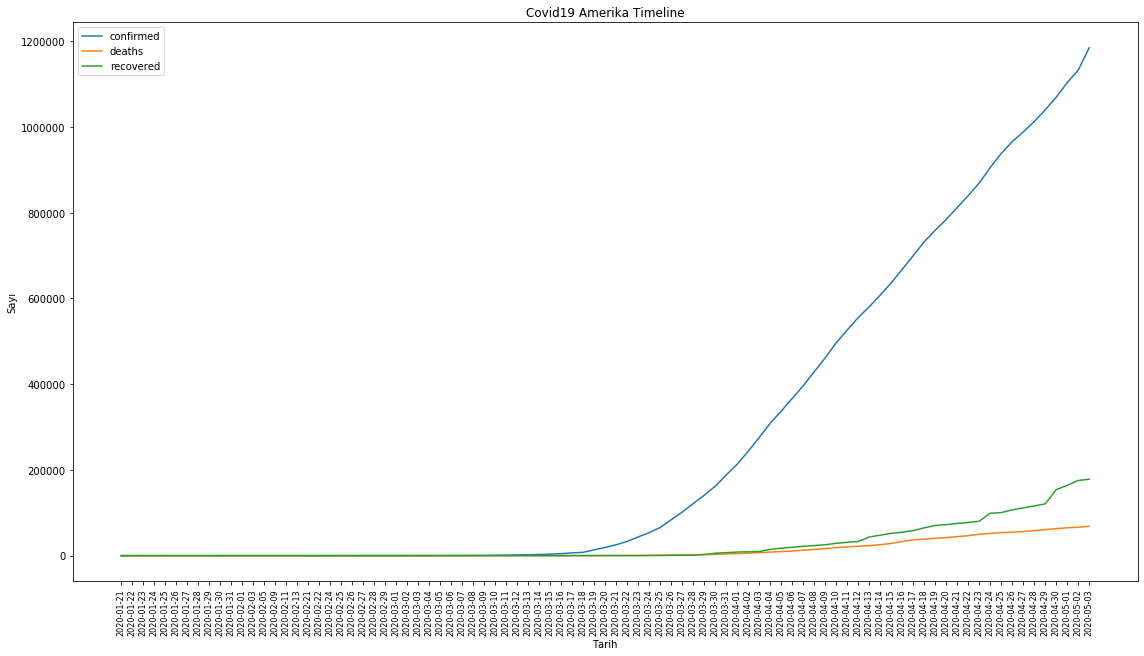

In [31]:
timeline_graph("Amerika")

Uzatmamak adına Türkiye ve Amerikayı çizdirdim, fakat aynı şekilde diğer ülkelerin de grafiğini çizdirebiliriz 

# Kıta Bazında Görselleştirme

Şimdi bir fonksiyon tanımlayacağım, parametre olarak verilen kıtadaki ülkelerin vaka sayısı grafiğini çizecek.Program notebook üzerinde çalıştığı için grafikler küçük gözüküyor.
%matplotlib qt komutunu çalıştırıp grafikleri ayrı bir sekmede açabilirsiniz

In [32]:
def confirmed_graph(kita):
    plt.rcParams["figure.figsize"] = [16,9]
    plt.style.use("seaborn-ticks")
    continent = grouped_data.get_group(kita).sort_values(by="latest_data.confirmed", ascending=False)

    plt.barh(continent.iloc[0:15]['name'], continent.iloc[0:15]['latest_data.confirmed'],  label = "# of case")

    plt.xlabel("Cases")
    plt.ylabel("Country")
    plt.title(f"Covid19 {kita} verileri")

    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()

    plt.show() 
    

### Bu fonksiyon verdiğiniz kıtadaki en fazla vaka olan 15 ülkeyi barplot grafiğine döker

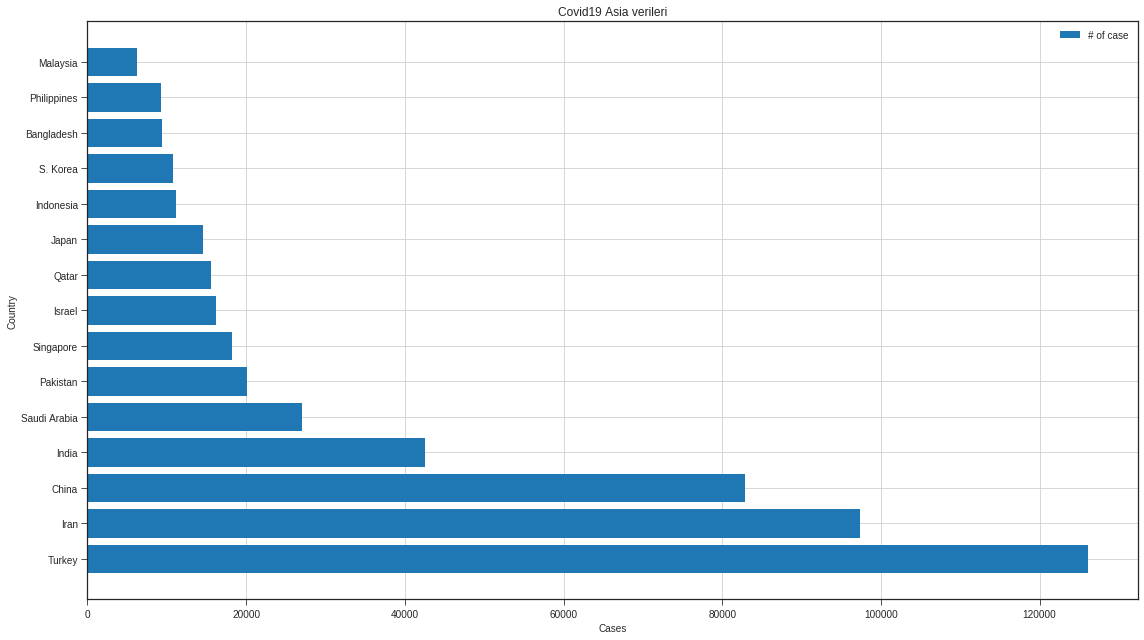

In [33]:
confirmed_graph("Asia")

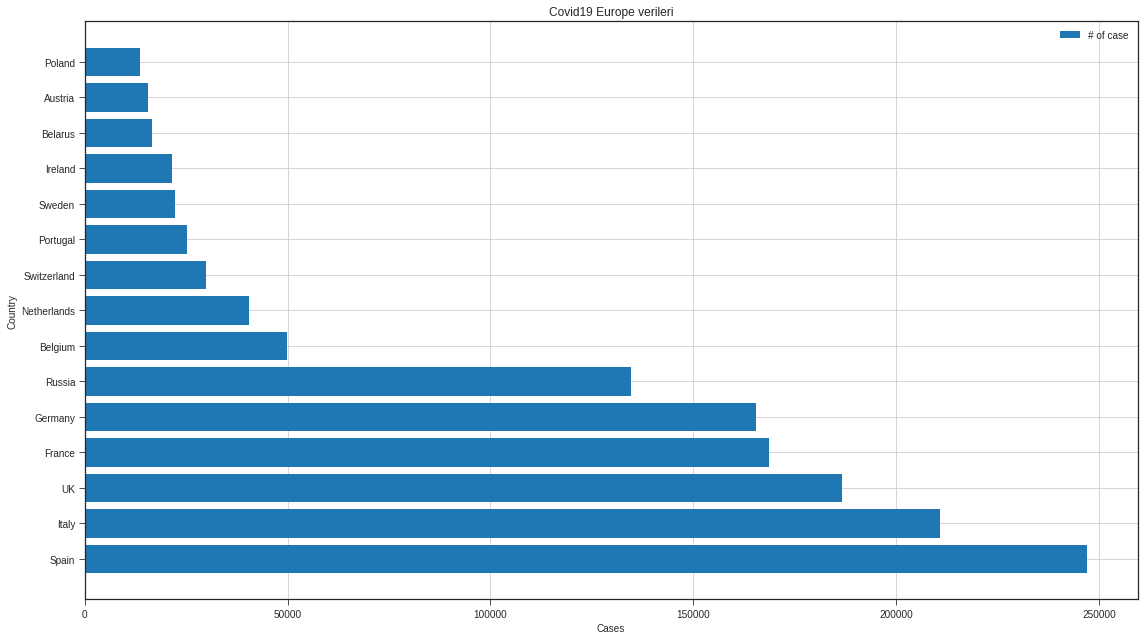

In [34]:
confirmed_graph("Europe")

### İşi biraz daha ileriye götürüp fonksiyonu şöyle değiştirebiriz.

In [35]:
def graph(kita,data,log=False):
    plt.rcParams["figure.figsize"] = [16,9]
    plt.style.use("seaborn-ticks")
    continent = grouped_data.get_group(kita).sort_values(by=f"latest_data.{data}", ascending=False)

    plt.barh(continent.iloc[0:15]['name'], continent.iloc[0:15][f'latest_data.{data}'],  label = f"# of {data}", log=log)

    plt.xlabel("Cases")
    plt.ylabel("Country")
    plt.title(f"{kita} | {data}")

    plt.legend(loc='upper right')
    plt.grid(True)

    plt.tight_layout()

    plt.show() 
    

### Artık fonksiyona 3 parametre veriyoruz,Kıtanın ismi ,hangi veriyi istediğimiz ve artışın logaritmik olup olmayacağı.Verdiğimiz parametreye göre grafiği çizecek(deaths,confirmed vs.)
Örneğin Amerika kıtasında ülkeler arasındaki fark Amerika Birleşik Devletlerinde vaka sayının diğerlerine göre çok fazla olmasından dolayı artışın logaritmik olması daha mantıklı olacaktır. Aşağıda bununla alakalı bir örnek yaptım. 

### Asya kıtasında en fazla ölüm olan 15 ülkenin grafiği 

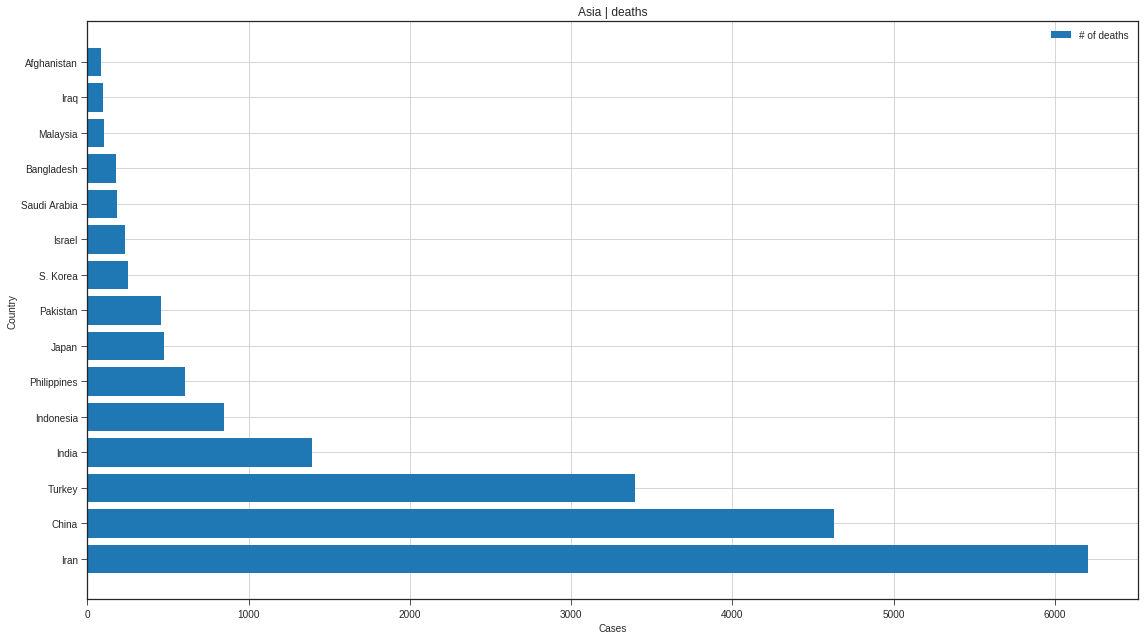

In [36]:
graph("Asia","deaths")

### Avrupa kıtasında en çok vaka sayısı bulunan 15 ülkenin grafiği

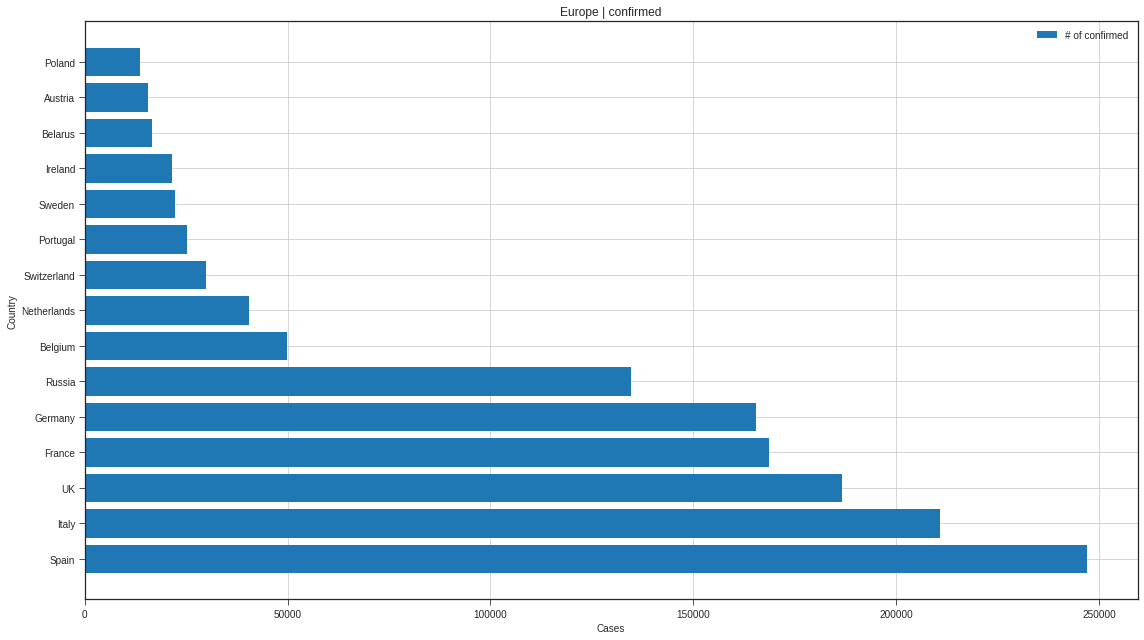

In [37]:
graph("Europe",'confirmed')

### Amerika kıtasında en çok ölüm olan 15 ülkenin grafiği

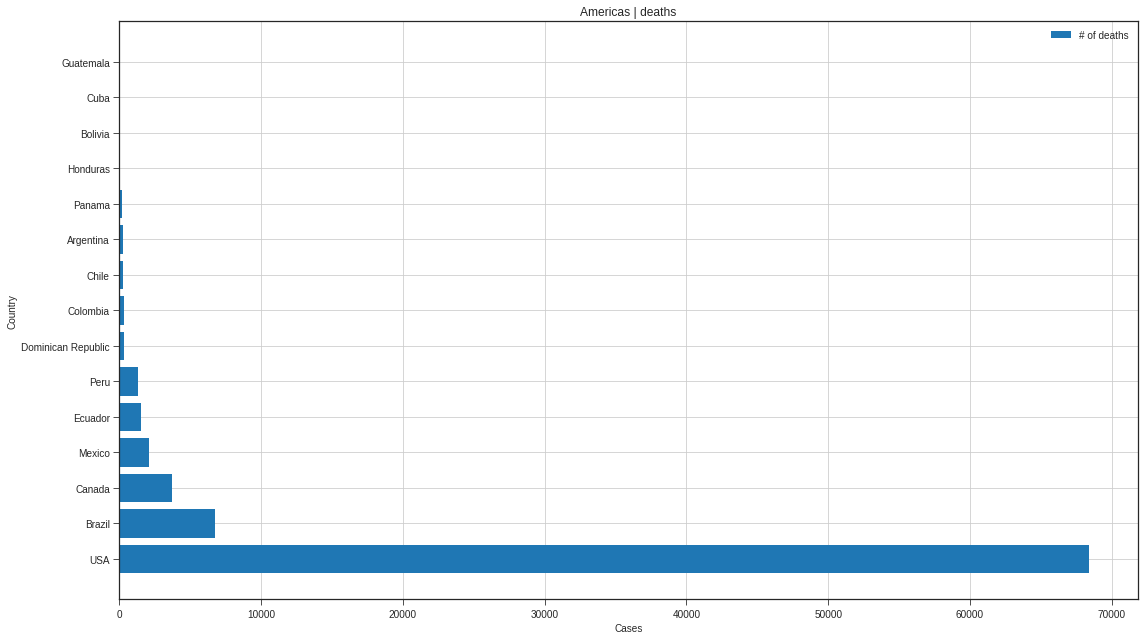

In [38]:
graph("Americas","deaths")

**Cuba gibi ülkelerde vaka olmasına rağmen Amerika Birleşik Devletlerindeki vaka sayısının fazlalığından dolayı grafikte gözükmüyor. Artışı logaritmik yapıyorum: **

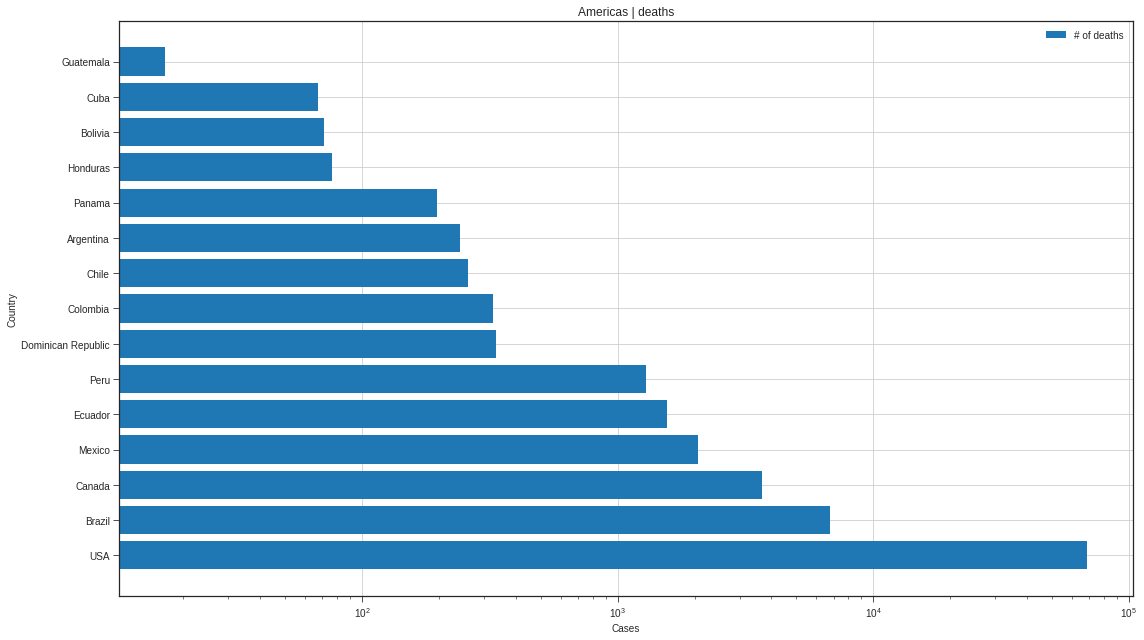

In [39]:
graph("Americas","deaths",log=True)

### Aşağıda tanımladığım piechart( ) fonksiyonu ise parametre olarak verilen kıtanın, yine parametre olarak verilen ülkenin verisine göre pasta grafiğini çiziyor

In [40]:
def piechart(kita,data):
    continent = grouped_data.get_group(kita).sort_values(by=f"latest_data.{data}", ascending=False)
    plt.rcParams["figure.figsize"] = [25,16]
    plt.style.use("fast")
    

    plt.title(f"{kita} | {data}")
    

    plt.pie(continent.iloc[0:10][f'latest_data.{data}'], labels =continent.iloc[0:10]['name'] , shadow=True,
            startangle=70, autopct="%2.1f%%", 
            wedgeprops={"edgecolor":"black"})

    plt.tight_layout()

    plt.show( )

### Asya kıtasındaki ülkelerin vaka sayısı oranları

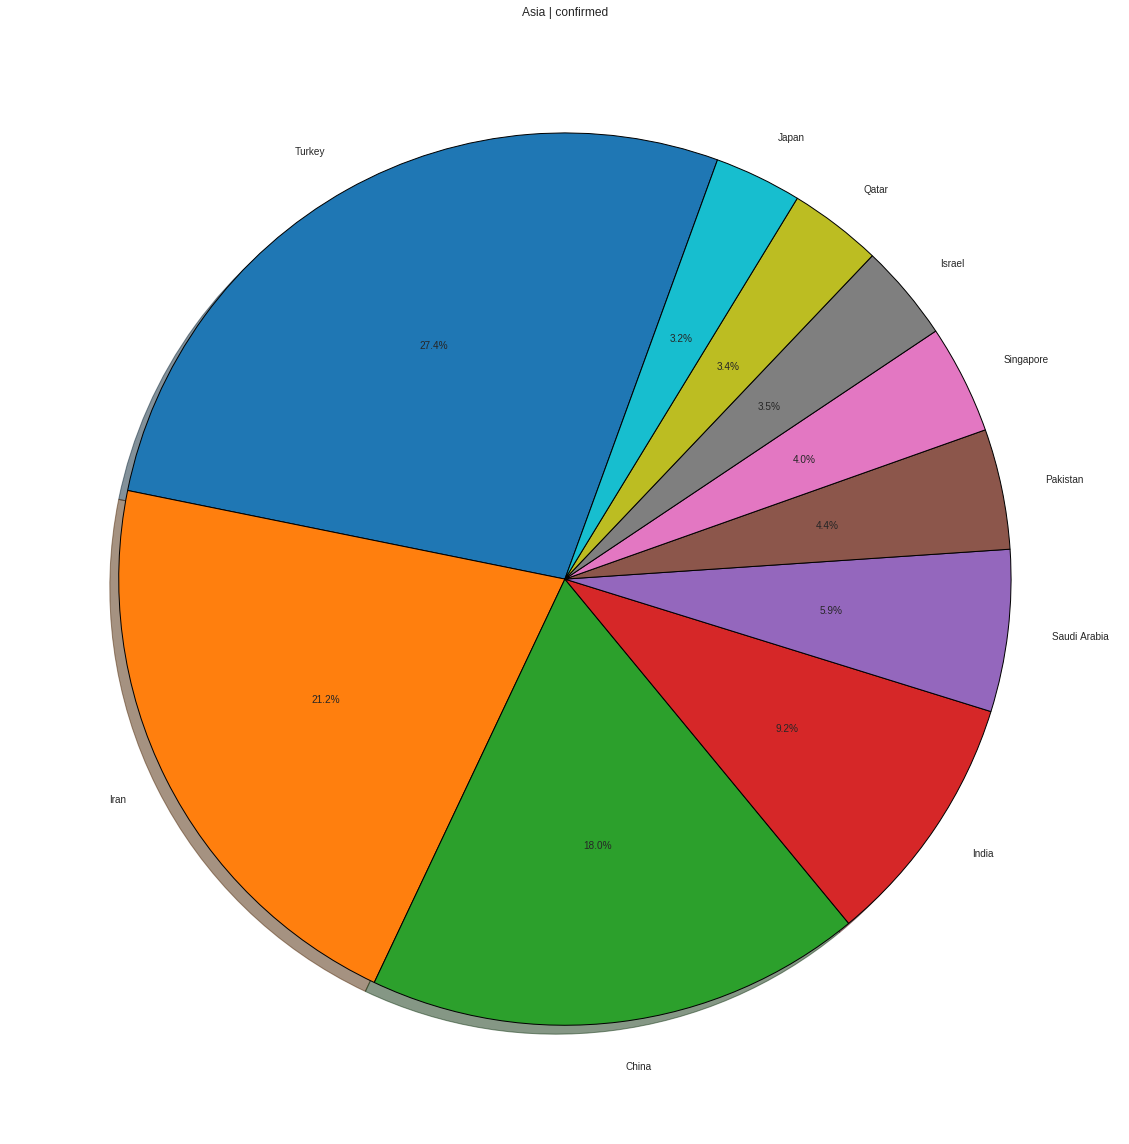

In [41]:
piechart("Asia","confirmed")

### Avrupa kıtasındaki ülkelerin ölüm sayısı oranları

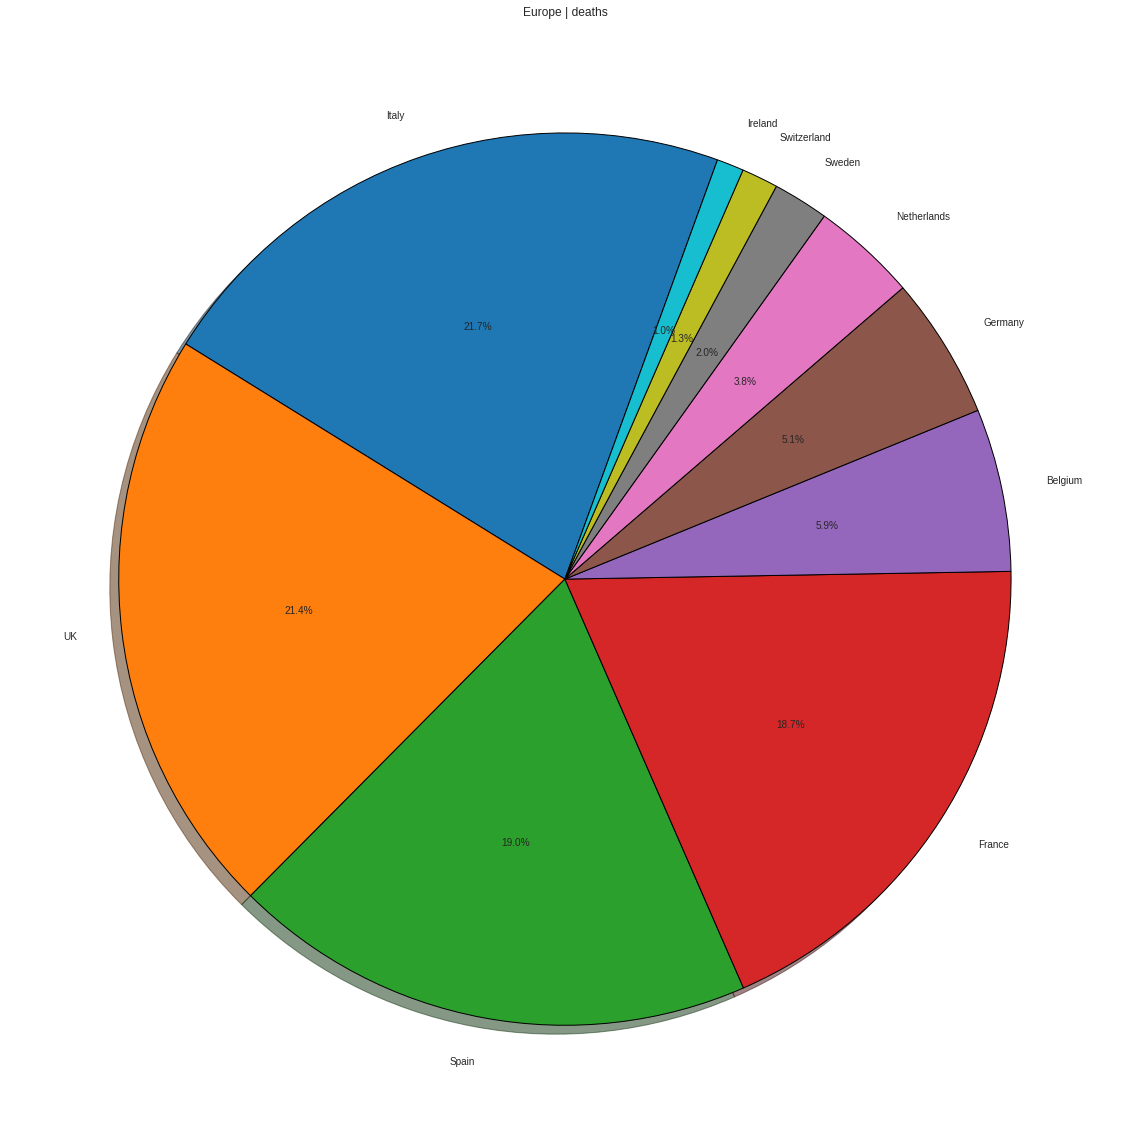

In [42]:
piechart("Europe","deaths")